<a href="https://colab.research.google.com/github/simmran2003/Medical-Transcription-Prediction-System/blob/main/Medicine_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv(r"https://raw.githubusercontent.com/Shashvat207/Medicine_Transcriptions_Predictions/main/mtsamples.csv")

In [ ]:
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
data["medical_specialty"].value_counts()

medical_specialty
 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmet

**DATA PREPRATION**

In [ ]:
#this function takes input dataset and sample size and return only those classes whose value counts is greater than the sample size
def gather_data(dataset,sample_size):
  value_counts = dataset["medical_specialty"].value_counts()
  filtered_classes = value_counts[value_counts > sample_size].index.tolist()
  #print(filtered_classes)
  return dataset[dataset["medical_specialty"].isin(filtered_classes)]

In [ ]:
def generate_sample(dataset, sample_size):
  data = pd.DataFrame(columns=dataset.columns)
  filtered = dataset["medical_specialty"].value_counts()
  for i,j in filtered.items():
    if j < sample_size:
      filtered_df = dataset[dataset["medical_specialty"] == i]
      data = pd.concat([data, filtered_df], ignore_index=True)
    else:
      filtered_df = dataset[dataset["medical_specialty"] == i].sample(sample_size)
      data = pd.concat([data, filtered_df], ignore_index=True)
  return data.dropna()

In [ ]:
data=gather_data(data,200)
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
7,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
9,9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."
11,11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler..."


In [ ]:
data["medical_specialty"].value_counts()

medical_specialty
 Surgery                       1103
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     372
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               230
 Neurology                      223
Name: count, dtype: int64

In [ ]:
data=generate_sample(data,300)
data["medical_specialty"].value_counts()

medical_specialty
 Surgery                       280
 Orthopedic                    256
 Radiology                     251
 Cardiovascular / Pulmonary    223
 Gastroenterology              195
 Neurology                     168
 General Medicine              146
 Consult - History and Phy.    131
Name: count, dtype: int64

In [ ]:
!pip install -U nltk

**Text Preprocessing and Pipelining**

In [ ]:
import nltk , spacy , textblob

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords

In [ ]:
def spelling_correction(text):
  textblob=TextBlob(text)
  return textblob.correct().string

In [ ]:
import string
exclude=string.punctuation
def remove_punctuation(text):
  for char in text:
    if char in exclude:
      text=text.replace(char,"")
  return text

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop=stopwords.words("english")
def remove_stop_words(text):
  new_text=[]
  for word in text.split():
    if word in stop:
      new_text.append("")
    else:
      new_text.append(word)
  return " ".join(new_text)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stem_text(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
def text_preprocessing(text):
  text=text.lower()
  text=remove_punctuation(text)
  text=remove_stop_words(text)
  #text=spelling_correction(text)
  text=stem_text(text)
  return text

In [ ]:
data["preprocessed_transcription"]=data["transcription"].apply(lambda x :text_preprocessing(x))

In [ ]:
data["preprocessed_transcription"]

0       preoper diagnosi necrot infect left lower abdo...
1       preoper diagnosis1 hemoptysis2 histori lung ca...
2       oper subxiphoid pericardi windowanesthesia gen...
3       preoper diagnosi umbil herniapostop diagnosi u...
4       preoper diagnoses1 squamou cell carcinoma head...
                              ...                        
2177    subject patient 75yearold femal come today con...
2178    cc episod confusionhx 65 yo rhm reportedli suf...
2180    xyzr abcmed record 123dear dr xyzi saw abc bac...
2181    cc seizureshx patient initi evalu uihc 7 year ...
2183    cc memori difficultyhx 64 yo rhm difficulti re...
Name: preprocessed_transcription, Length: 1650, dtype: object

In [ ]:
data["preprocessed_description"]=data["description"].apply(lambda x :text_preprocessing(x))

In [ ]:
data["preprocessed_description"]

0       primari low transvers cervic cesarean section ...
1       sparc suburethr sling due stress urinari incontin
2       melena solitari eros fold ge junction gastric ...
3       dental restor extract dental cari multipl seve...
4       nasal septoplasti bilater submuc resect inferi...
                              ...                        
2177                  75yearold femal come concern stroke
2178                    mri right tempor lobe astrocytoma
2180    patient seen neurooncolog clinic increas quest...
2181    ct brain arachnoid cyst arachnoid cyst diagnos...
2183    mri brain pet scan dementia alzheim type prima...
Name: preprocessed_description, Length: 1651, dtype: object

In [ ]:
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,preprocessed_transcription,preprocessed_description
0,223,"Right ulnar nerve transposition, right carpal...",Surgery,Ulnar Nerve Transposition & Olecranon Bursa E...,"PREOPERATIVE DIAGNOSIS: ,1. Right cubital tu...","surgery, cubital tunnel syndrome, carpal tunne...",preoper diagnosi 1 right cubit tunnel syndrome...,right ulnar nerv transposit right carpal tunne...
2,1049,Removal of chest wall mass. The area of the ...,Surgery,Chest Wall Mass Removal,"PREOPERATIVE DIAGNOSIS:, Chest wall mass, lef...","surgery, chest wall mass, local anesthetic, lo...",preoper diagnosi chest wall mass leftpostop di...,remov chest wall mass area mass anterior lower...
3,992,Patient with history of polyps.,Surgery,Colonoscopy - 9,"PREOPERATIVE DIAGNOSIS:, Prior history of pol...","surgery, ileocecal valve, sigmoid colon, polyp...",preoper diagnosi prior histori polypspostop di...,patient histori polyp
4,1085,Carpal tunnel release with transverse carpal ...,Surgery,Carpal Ligament Reconstruction,"PROCEDURE:, Carpal tunnel release with transv...","surgery, carpal tunnel, carpal ligament recons...",procedur carpal tunnel releas transvers carpal...,carpal tunnel releas transvers carpal ligament...
5,320,"Emergent subxiphoid pericardial window, trans...",Surgery,Subxiphoid Pericardial Window,"PREOPERATIVE DIAGNOSIS (ES):,1. Endocarditis.,...","surgery, endocarditis, valve replacement, st. ...",preoper diagnosi es1 endocarditis2 statu post ...,emerg subxiphoid pericardi window transesophag...


**Training a BaseLine Model for transcription**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
import re
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
multilabel=MultiLabelBinarizer()
y=multilabel.fit_transform(data["medical_specialty"])

In [ ]:
multilabel=MultiLabelBinarizer()
y=multilabel.fit_transform(data["medical_specialty"])
one_hot_encoded_data = pd.get_dummies(data, columns = ["medical_specialty"])

In [ ]:
y=one_hot_encoded_data
y=y.drop(columns=["Unnamed: 0",	"description",	"sample_name"	,"transcription"	,"keywords"	,"preprocessed_transcription"])

In [ ]:
tfidf=TfidfVectorizer(analyzer='word',max_features=5000,ngram_range=(1,3),stop_words='english')
x=tfidf.fit_transform(data["preprocessed_transcription"])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape
lr=LogisticRegression(solver='liblinear',penalty='l2')
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
lr=LogisticRegression(solver='lbfgs')
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
ytrain.head()

,medical_specialty_ Cardiovascular / Pulmonary,medical_specialty_ Consult - History and Phy.,medical_specialty_ Gastroenterology,medical_specialty_ General Medicine,medical_specialty_ Neurology,medical_specialty_ Orthopedic,medical_specialty_ Radiology,medical_specialty_ Surgery
1120,False,False,False,False,False,True,False,False
1769,False,False,True,False,False,False,False,False
1382,False,False,False,False,False,False,True,False
1502,False,False,False,True,False,False,False,False
1006,False,False,False,False,False,True,False,False


In [ ]:
clf=OneVsRestClassifier(lr)
clf.fit(xtrain,ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,clf.predict(xtest))

0.11854103343465046

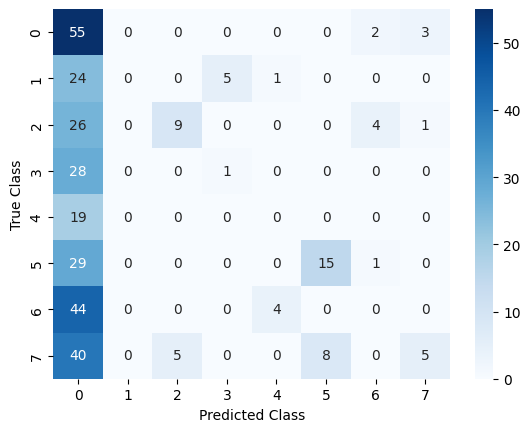

In [ ]:
actual=ytest.values
predicted=clf.predict(xtest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
from sklearn.svm import SVC
svm=SVC()
clf=OneVsRestClassifier(svm)
clf.fit(xtrain,ytrain)
print(accuracy_score(ytest,clf.predict(xtest)))

OneVsRestClassifier(estimator=SVC())

0.20972644376899696

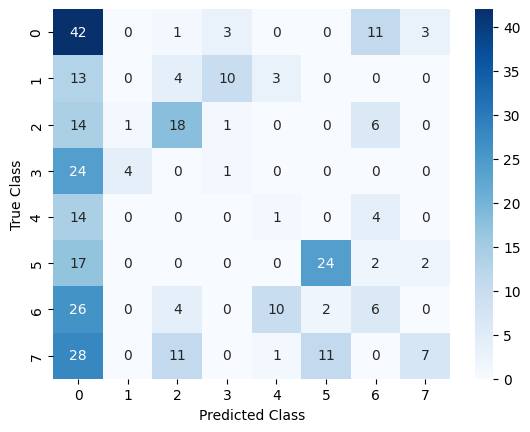

In [ ]:
actual=ytest.values
predicted=clf.predict(xtest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
clf=OneVsRestClassifier(dt)
clf.fit(xtrain,ytrain)
accuracy_score(ytest,clf.predict(xtest))

OneVsRestClassifier(estimator=DecisionTreeClassifier())

0.1945288753799392

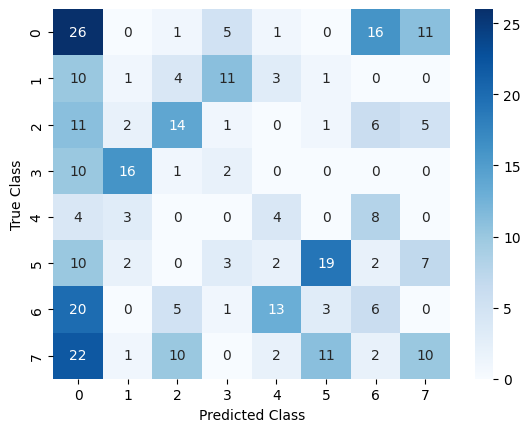

In [ ]:
actual=ytest.values
predicted=clf.predict(xtest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()
clf=OneVsRestClassifier(rfc)
clf.fit(xtrain,ytrain)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
accuracy_score(ytest,clf.predict(xtest))

0.19756838905775076

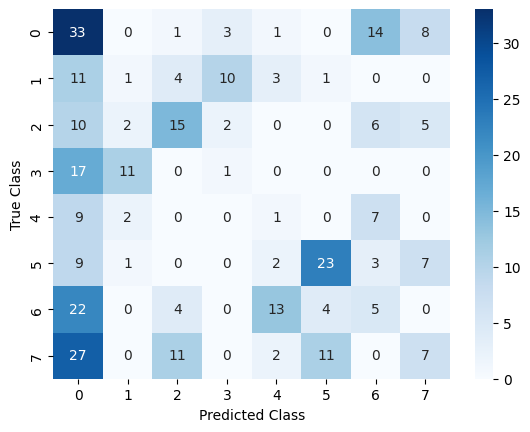

In [ ]:
actual=ytest.values
predicted=clf.predict(xtest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

**Using CBOW**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=100,binary=True)

In [ ]:
C=cv.fit_transform(data["preprocessed_description"]).toarray()

In [ ]:
Ctrain,Ctest,ytrain,ytest=train_test_split(C,y,test_size=0.2,random_state=42)
Ctrain.shape,Ctest.shape,ytrain.shape,ytest.shape

((1314, 100), (329, 100), (1314, 8), (329, 8))

In [ ]:
clf=OneVsRestClassifier(lr)
clf.fit(Ctrain,ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
accuracy_score(ytest,clf.predict(Ctest))

0.1519756838905775

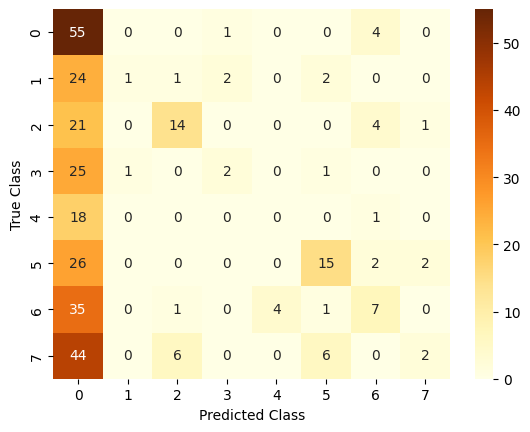

In [ ]:
actual=ytest.values
predicted=clf.predict(Ctest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="YlOrBr")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
svm=SVC()
clf=OneVsRestClassifier(svm)
clf.fit(Ctrain,ytrain)

OneVsRestClassifier(estimator=SVC())

In [ ]:
accuracy_score(ytest,clf.predict(Ctest))

0.1276595744680851

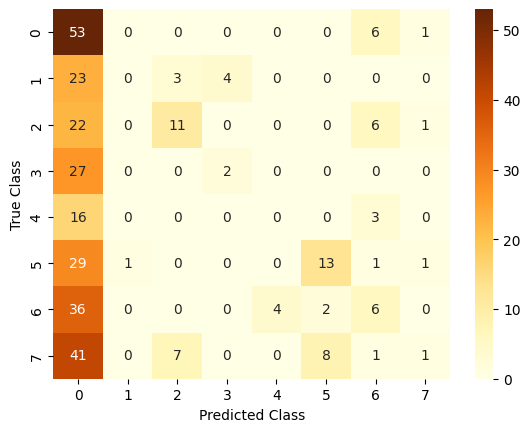

In [ ]:
actual=ytest.values
predicted=clf.predict(Ctest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="YlOrBr")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
dt=DecisionTreeClassifier()
clf=OneVsRestClassifier(dt)
clf.fit(Ctrain,ytrain)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [ ]:
accuracy_score(ytest,clf.predict(Ctest))

0.13677811550151975

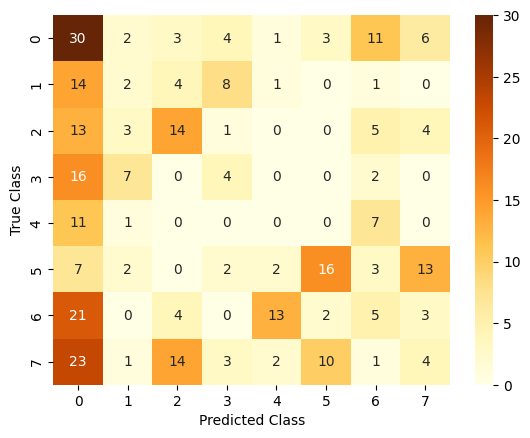

In [ ]:
actual=ytest.values
predicted=clf.predict(Ctest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="YlOrBr")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
rfc=RandomForestClassifier()
clf=OneVsRestClassifier(rfc)
clf.fit(Ctrain,ytrain)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
accuracy_score(ytest,clf.predict(Ctest))

0.16717325227963525

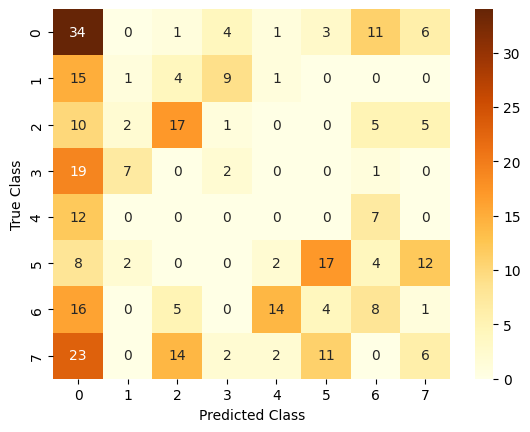

In [ ]:
actual=ytest.values
predicted=clf.predict(Ctest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="YlOrBr")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

**Using TFIDF**

In [ ]:
z=tfidf.fit_transform(data["preprocessed_description"])

In [ ]:
ztrain,ztest,ytrain,ytest=train_test_split(z,y,test_size=0.2,random_state=42)
ztrain.shape,ztest.shape,ytrain.shape,ytest.shape

((1314, 5000), (329, 5000), (1314, 8), (329, 8))

In [ ]:
clf=OneVsRestClassifier(lr)
clf.fit(ztrain,ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
accuracy_score(ytest,clf.predict(ztest))

0.04559270516717325

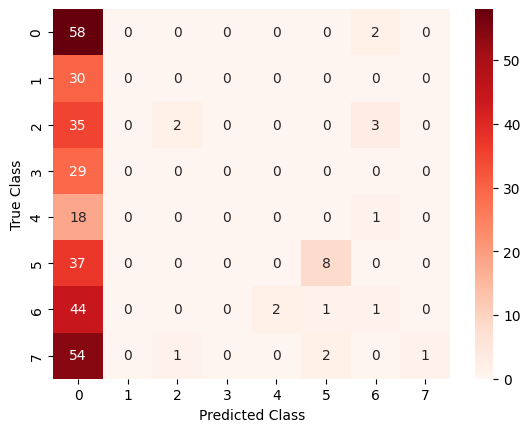

In [ ]:
actual=ytest.values
predicted=clf.predict(ztest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Reds")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
svm=SVC()
clf=OneVsRestClassifier(svm)
clf.fit(ztrain,ytrain)

OneVsRestClassifier(estimator=SVC())

In [ ]:
accuracy_score(ytest,clf.predict(Ctest))

0.1276595744680851

In [ ]:
actual=ytest.values

In [ ]:
predicted=clf.predict(ztest)

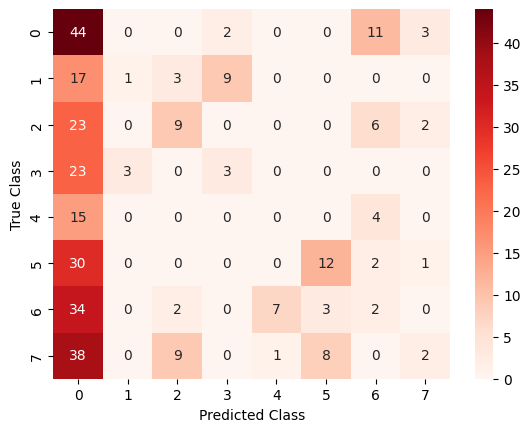

In [ ]:
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Reds")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
dt=DecisionTreeClassifier()
clf=OneVsRestClassifier(dt)
clf.fit(ztrain,ytrain)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [ ]:
accuracy_score(ytest,clf.predict(ztest))

0.182370820668693

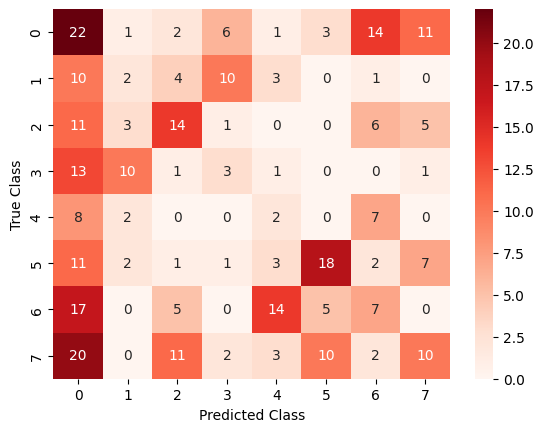

In [ ]:
actual=ytest.values
predicted=clf.predict(ztest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Reds")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
rfc=RandomForestClassifier()
clf=OneVsRestClassifier(rfc)
clf.fit(ztrain,ytrain)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
accuracy_score(ytest,clf.predict(ztest))

0.182370820668693

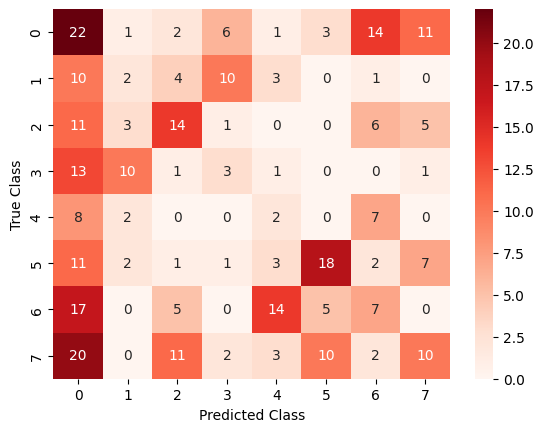

In [ ]:
actual=ytest.values
predicted=clf.predict(ztest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Reds")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

**Using Word2Vec**

In [ ]:
from gensim.models import Word2Vec
import gensim

In [ ]:
model1 = gensim.models.Word2Vec(data["preprocessed_description"], min_count=1,vector_size=100, window=5)

In [ ]:
model2 = gensim.models.Word2Vec(data["preprocessed_description"], min_count=1, vector_size=100,window=5, sg=1)

In [ ]:
import numpy as np

def get_average_word2vec(tokens, model, vector_size):
    vector = np.zeros(vector_size)
    count = 0
    for token in tokens:
        if token in model.wv.key_to_index:
            vector += model.wv[token]
            count += 1
    if count != 0:
        vector /= count
    return vector

# Create feature vectors for each document
vector_size = 100
data["word_description"] = data["preprocessed_description"].apply(lambda tokens: get_average_word2vec(tokens, model1, vector_size))

# Stack the feature vectors into a 2D array
w2v = np.stack(data["word_description"].values)



In [ ]:
w2vtrain,w2vtest,ytrain,ytest=train_test_split(w2v,y,test_size=0.2,random_state=42)
w2vtrain.shape,w2vtest.shape,ytrain.shape,ytest.shape

((1314, 100), (329, 100), (1314, 8), (329, 8))

In [ ]:
clf=OneVsRestClassifier(lr)
clf.fit(w2vtrain,ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
accuracy_score(ytest,clf.predict(w2vtest))

0.0

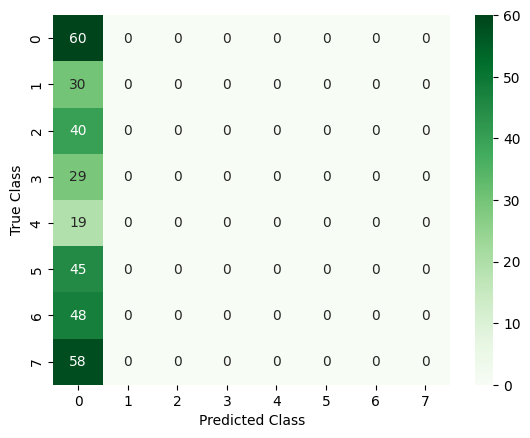

In [ ]:
actual=ytest.values
predicted=clf.predict(w2vtest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Greens")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
svm=SVC()
clf=OneVsRestClassifier(svm)
clf.fit(w2vtrain,ytrain)

OneVsRestClassifier(estimator=SVC())

In [ ]:
accuracy_score(ytest,clf.predict(w2vtest))

0.0

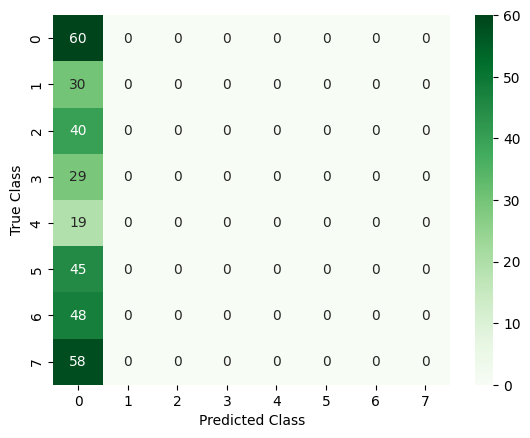

In [ ]:
actual=ytest.values
predicted=clf.predict(w2vtest)
y_true = np.argmax(actual, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Greens")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

**Using GloVe**

In [ ]:
6600000/5000


1320.0

**Model Training Using LSTM GRU AND ATTENTION MECHANISM**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models , Sequential
from keras.layers import Dense,LSTM,GRU

In [ ]:
x_train = xtrain.toarray().reshape(xtrain.shape[0],1,5000)

In [ ]:
model = models.Sequential([
    layers.Input(shape=(1,5000)),
    LSTM(128, return_sequences=True),
    LSTM(128, return_sequences=True),
    layers.Flatten(),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='elu'),
    #layers.Dropout(0.20),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    #layers.Dropout(0.20),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    #layers.Dropout(0.20),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='elu'),
    layers.Dense(8, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,ytrain.values, epochs=20,validation_split=0.2)

Epoch 1/20
33/33 [==============================] - 12s 47ms/step - loss: 1.7634 - accuracy: 0.3438 - val_loss: 2.0598 - val_accuracy: 0.1515
Epoch 2/20
33/33 [==============================] - 0s 12ms/step - loss: 1.0922 - accuracy: 0.5985 - val_loss: 2.0681 - val_accuracy: 0.1515
Epoch 3/20
33/33 [==============================] - 0s 11ms/step - loss: 0.7993 - accuracy: 0.6941 - val_loss: 2.0454 - val_accuracy: 0.1932
Epoch 4/20
33/33 [==============================] - 0s 12ms/step - loss: 0.7141 - accuracy: 0.7131 - val_loss: 2.0491 - val_accuracy: 0.1136
Epoch 5/20
33/33 [==============================] - 0s 13ms/step - loss: 0.6064 - accuracy: 0.7737 - val_loss: 2.0491 - val_accuracy: 0.1477
Epoch 6/20
33/33 [==============================] - 0s 12ms/step - loss: 0.5762 - accuracy: 0.7652 - val_loss: 1.8604 - val_accuracy: 0.2538
Epoch 7/20
33/33 [==============================] - 0s 12ms/step - loss: 0.5290 - accuracy: 0.7973 - val_loss: 1.8331 - val_accuracy: 0.2803
Epoch 8/20
3

In [ ]:
 predicted=model.predict(xtest.toarray().reshape(xtest.shape[0],1,5000))

11/11 [==============================] - 1s 3ms/step


In [ ]:
loss, accuracy = model.evaluate(xtest.toarray().reshape(xtest.shape[0],1,5000), ytest)

11/11 [==============================] - 0s 5ms/step - loss: 2.5350 - accuracy: 0.4424


In [ ]:
print(loss,accuracy)

2.535027503967285 0.4424242377281189


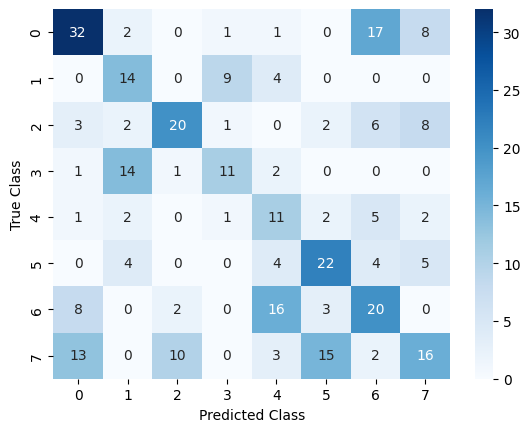

In [ ]:
y_true = np.argmax(ytest, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
z_train = ztrain.toarray().reshape(1314,500,10)

NameError: name 'ztrain' is not defined

In [ ]:
model.fit(z_train,ytrain.values, epochs=20,validation_split=0.2)

Epoch 1/20
33/33 [==============================] - 6s 41ms/step - loss: 2.0843 - accuracy: 0.1389 - val_loss: 2.0572 - val_accuracy: 0.1407
Epoch 2/20
33/33 [==============================] - 1s 21ms/step - loss: 2.0583 - accuracy: 0.1741 - val_loss: 2.0369 - val_accuracy: 0.2281
Epoch 3/20
33/33 [==============================] - 1s 29ms/step - loss: 1.9912 - accuracy: 0.2198 - val_loss: 1.9366 - val_accuracy: 0.2624
Epoch 4/20
33/33 [==============================] - 1s 31ms/step - loss: 1.7845 - accuracy: 0.3473 - val_loss: 1.7021 - val_accuracy: 0.4068
Epoch 5/20
33/33 [==============================] - 1s 33ms/step - loss: 1.4350 - accuracy: 0.4748 - val_loss: 1.6130 - val_accuracy: 0.4449
Epoch 6/20
33/33 [==============================] - 1s 21ms/step - loss: 1.1924 - accuracy: 0.5519 - val_loss: 1.6565 - val_accuracy: 0.4183
Epoch 7/20
33/33 [==============================] - 1s 21ms/step - loss: 1.0055 - accuracy: 0.6042 - val_loss: 1.6773 - val_accuracy: 0.4297
Epoch 8/20
33

In [ ]:
predicted=model.predict(ztest.toarray().reshape(ztest.shape[0],500,10))

11/11 [==============================] - 1s 16ms/step


In [ ]:
print(loss,accuracy)

1.8663697242736816 0.4559270441532135


In [ ]:
y_true = np.argmax(ztest, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred).()
sns.heatmap(cm, annot=True, cmap="Reds")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

**USING CBOW VECTORIZER**

In [ ]:
c_train = Ctrain.toarray().reshape(1314,500,10)

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
model.fit(c_train,ytrain.values, epochs=20,validation_split=0.2)

In [ ]:
predicted=model.predict(Ctest.toarray().reshape(Ctest.shape[0],500,10))

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
print(loss,accuracy)

In [ ]:
y_true = np.argmax(ztest, axis=1)
y_pred = np.argmax(predicted, axis=1)
cm = confusion_matrix(y_true, y_pred).toarray()
sns.heatmap(cm, annot=True, cmap="YlOrBr")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,preprocessed_transcription
0,1052,Bilateral pleural effusion. Removal of bilat...,Surgery,Chest Tube Removal,"PREOPERATIVE DIAGNOSIS: , Bilateral pleural ef...","surgery, serous drainage, bilateral pleural ef...",preoper diagnosi bilater pleural effusionposto...
1,373,Arthroscopic subacromial decompression and re...,Surgery,Rotator Cuff Repair,"PREOPERATIVE DIAGNOSIS: , Rotator cuff tear, l...","surgery, rotator cuff tear, mini-arthrotomy, r...",preoper diagnosi rotat cuff tear leftpostop di...
2,315,Subxiphoid pericardiotomy. Symptomatic peric...,Surgery,Subxiphoid Pericardiotomy,"PREOPERATIVE DIAGNOSIS: , Symptomatic pericard...","surgery, subxiphoid pericardiotomy, symptomati...",preoper diagnosi symptomat pericardi effusionp...
3,778,Patient with complaint of a very painful left...,Surgery,Foot Lesions,"S -, An 84-year-old diabetic female, 5'7-1/2"" ...","surgery, painful left foot, lesions, plantar, ...",84yearold diabet femal 5712 tall 148 pound his...
4,801,Incompetent glottis. Fat harvesting from the...,Surgery,Fat Harvesting,"PREOPERATIVE DIAGNOSIS: , Incompetent glottis....","surgery, dedo laryngoscope, physiosol, micro l...",preoper diagnosi incompet glottispostop diagno...


(96,)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

0.03903903903903904

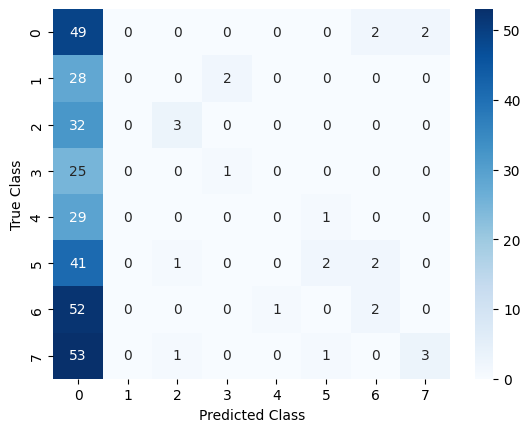

0.0


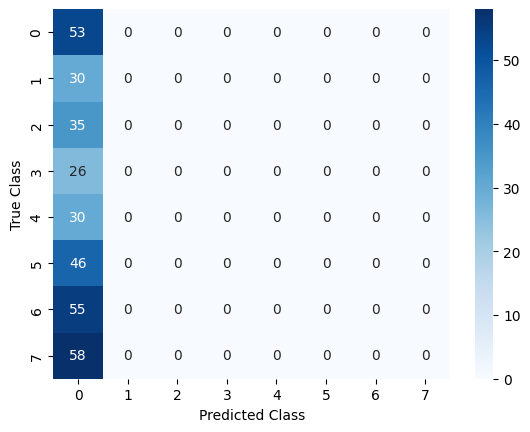

0.057057057057057055